In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [40]:
data = '''
# nelec  rs    nkpts     HF           CCSD
#   14  3.0     19      -0.6567906     -0.83994187
    14  3.0     57      -0.6567906     -0.95470081
    14  3.0     93      -0.6567906     -0.98199463
    14  3.0     171     -0.6567906     -0.99116099
    14  3.0     179     -0.6567906     -0.99141368
    14  3.0     251     -0.6567906     -0.993258311
'''

In [41]:
m = np.array([])
hf = np.array([])
ccsd = np.array([])
for lines in data.splitlines():
    if not lines.startswith('#') and len(lines) > 0:
        parts = lines.split()
        m = np.hstack((m,int(parts[2])))
        hf = np.hstack((hf,float(parts[3])))
        ccsd = np.hstack((ccsd,float(parts[4])))
ccsd_corr = ccsd - hf

In [42]:
inv_m = 1/m
A = np.column_stack([inv_m**2, inv_m, np.ones_like(inv_m)])
(a, b, c), residuals, rank, s = np.linalg.lstsq(A, ccsd_corr, rcond=None)

N = len(inv_m)
sigma2 = residuals[0] / (N - 3)      # variance of residuals
cov = sigma2 * np.linalg.inv(A.T @ A)

da, db, dc = np.sqrt(np.diag(cov))
print(f'extralopation a = {a:.8f} +/- {da:.8f}')
print(f'extralopation b = {b:.8f} +/- {db:.8f}')
print(f'extralopation b = {c:.8f} +/- {dc:.8f}')

extralopation a = 171.75908824 +/- 10.53567425
extralopation b = -0.88326461 +/- 0.23231452
extralopation b = -0.33532965 +/- 0.00101030


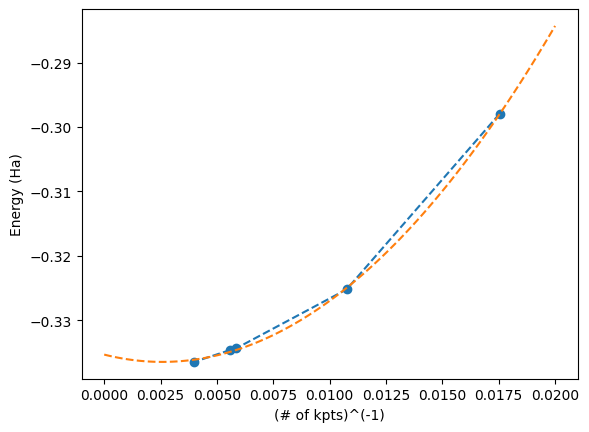

In [44]:
x = np.linspace(0,0.02,100)
eccsd_fit = a*x**2 + b*x + c

plt.plot(inv_m,ccsd_corr,'o--',label='CCSD')
plt.plot(x,eccsd_fit,'--',label='CCSD_fit')
plt.xlabel('(# of kpts)^(-1)')
plt.ylabel('Energy (Ha)')
plt.show()

In [45]:
inv_m = 1/m
A = np.column_stack([inv_m**2, np.ones_like(inv_m)])
(a, c), residuals, rank, s = np.linalg.lstsq(A, ccsd_corr, rcond=None)

N = len(inv_m)
sigma2 = residuals[0] / (N - 2)      # variance of residuals
cov = sigma2 * np.linalg.inv(A.T @ A)

da, dc = np.sqrt(np.diag(cov))
print(f'extralopation a = {a:.8f} +/- {da:.8f}')
print(f'extralopation b = {c:.8f} +/- {dc:.8f}')

extralopation a = 132.18814994 +/- 3.83168678
extralopation b = -0.33905786 +/- 0.00056961


#kpts extrapolated energy -0.33905786 +/- 0.00056961


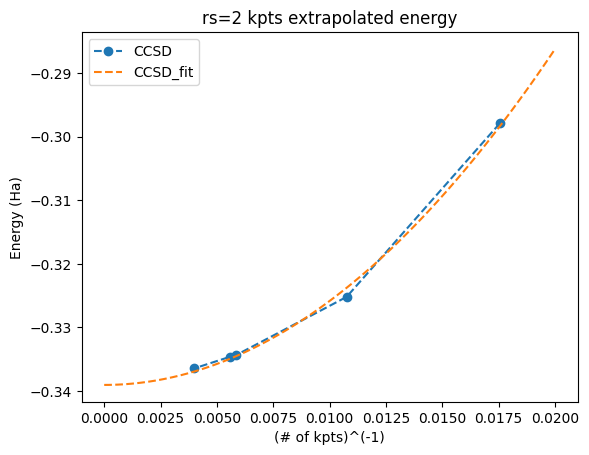

In [47]:
x = np.linspace(0,0.02,100)
eccsd_fit = a*x**2  + c
print(f'#kpts extrapolated energy {c:.8f} +/- {dc:.8f}')
plt.plot(inv_m,ccsd_corr,'o--',label='CCSD')
plt.plot(x,eccsd_fit,'--',label='CCSD_fit')
plt.xlabel('(# of kpts)^(-1)')
plt.ylabel('Energy (Ha)')
plt.title('rs=2 kpts extrapolated energy')
plt.legend()
plt.show()